#### Sheet Content# 
01. Importing libraries and data# 
02. Datcleaning
# 03. 
0Data Prep foRegression Analysis
# 04. . Regreion saanalysi# s
05. Bonus performance improvement after removinoutliersrs

# 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import HuberRegressor

 # 02. Load  cleaned data

In [2]:
# Load  cleaned data
data_cleaned=pd.read_csv(r'C:\Users\25670\Desktop\CiteBikes Analysis\02. Data\Prepared Data\citibike_clean.csv')

In [3]:
# Check for missing values
print(data_cleaned.isnull().sum())

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender_label                  0
start_year                    0
start_month                   0
end_hour                      0
Age                        6979
dtype: int64


In [4]:
data_cleaned.shape

(50000, 22)

In [6]:
#Creating a correlation matrix using pandas, Selecting only the numerical columns from the DataFrame

numerical_columns = data_cleaned.select_dtypes(include=['int', 'float'])

In [7]:
#Creating a segmented df with the variables being used in the pair plot
sub_df=numerical_columns[['bike_id', 'start_hour', 'start_station_id', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year', 'end_hour', 'Age' ]]

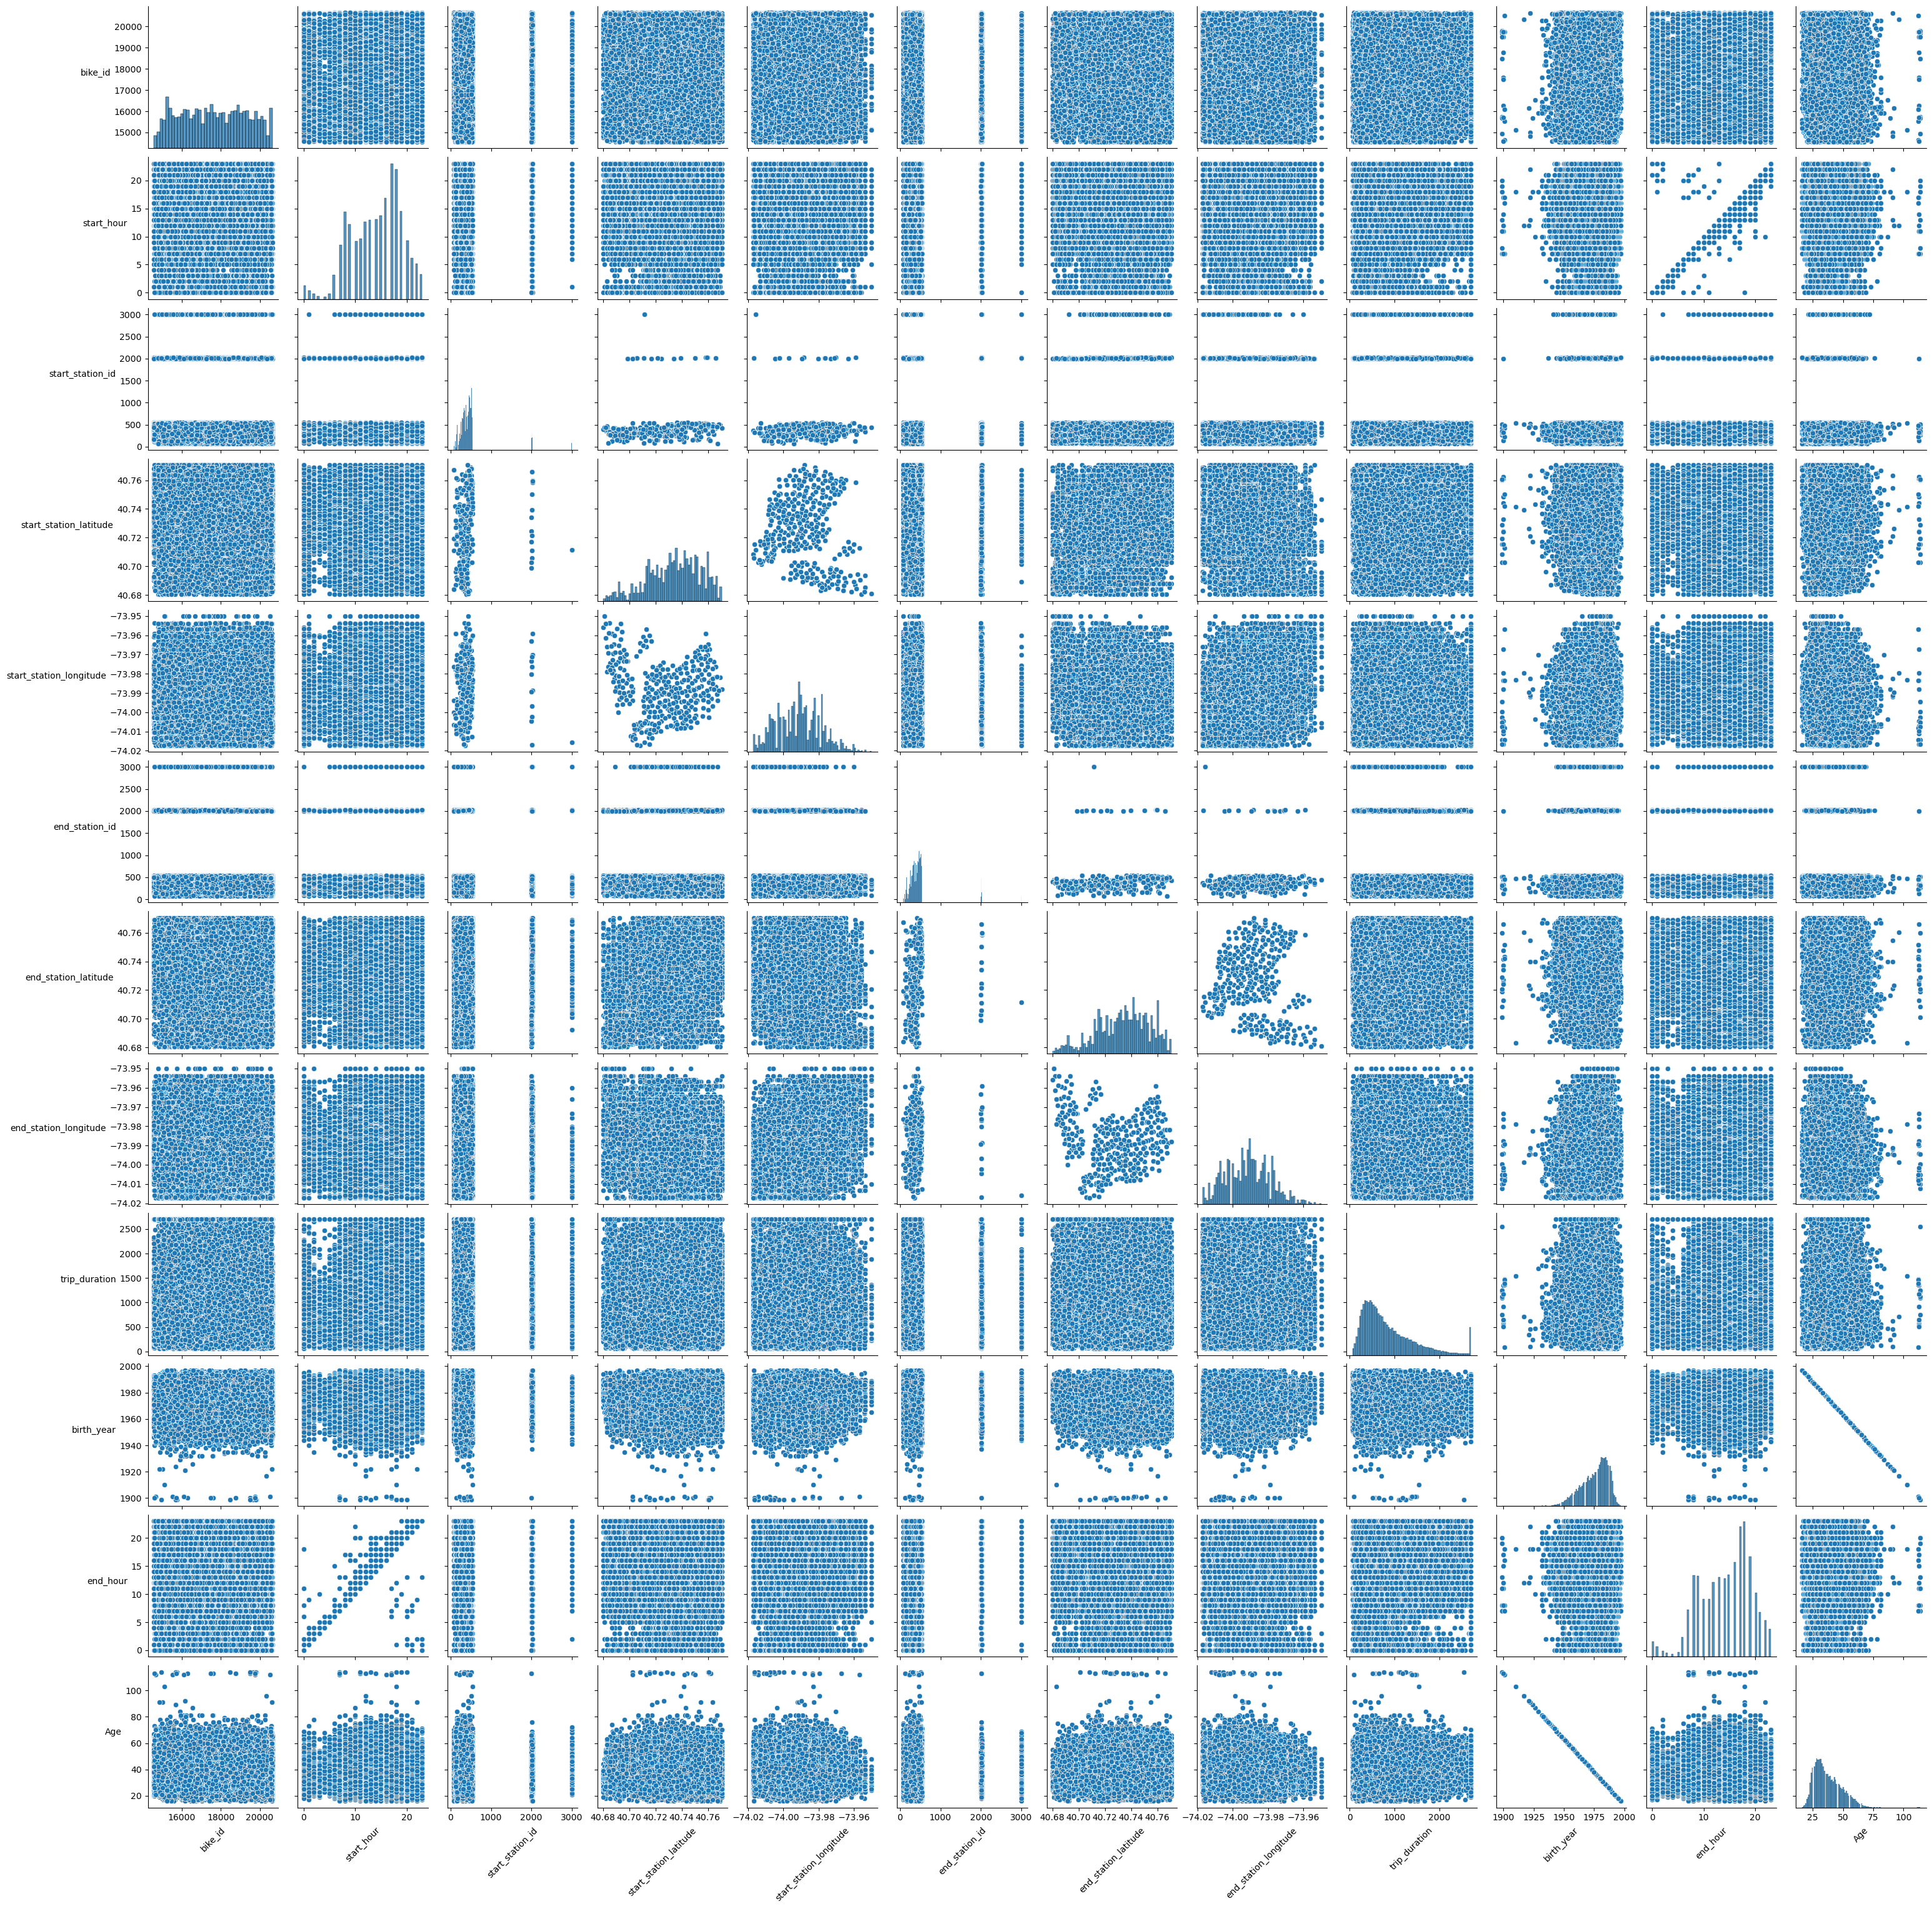

In [8]:
labels=['bike_id', 'start_hour', 'start_station_id', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year', 'end_hour', 'Age']
x=sns.pairplot(sub_df)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

### A. Start hour and End hour

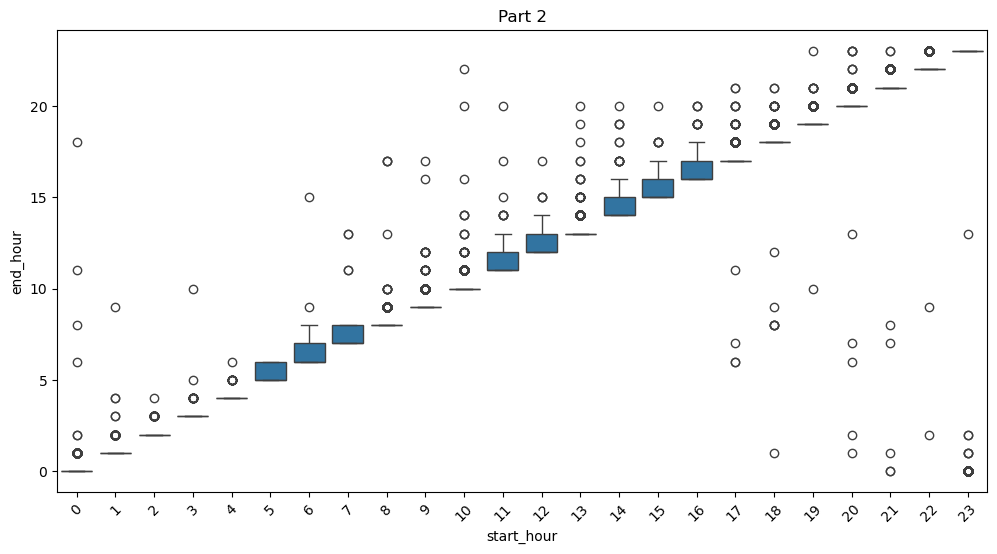

In [9]:
## Start hour and End hour

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='start_hour', y='end_hour', data=data_cleaned)
plt.title('Part 2')
plt.xticks(rotation=45)
plt.show()


# Hypothesis
# Null Hypothesis (H0): There is no significant difference between end_hour and start_hour for all trips.
# Alternative Hypothesis (H1): There is a significant difference between end_hour and start_hour for all trips.

We will explore this hypothesis visually through box plots and bar plots, and follow up with statistical testing to confirm the findings.

In [10]:
## Convert  variables into NumPy arrays:Define independent (X) and dependent (y) variables
X = data_cleaned['start_hour'].values.reshape(-1, 1)  # Reshape for sklearn
y = data_cleaned['end_hour'].values

In [11]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
### Run Linear Regression
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

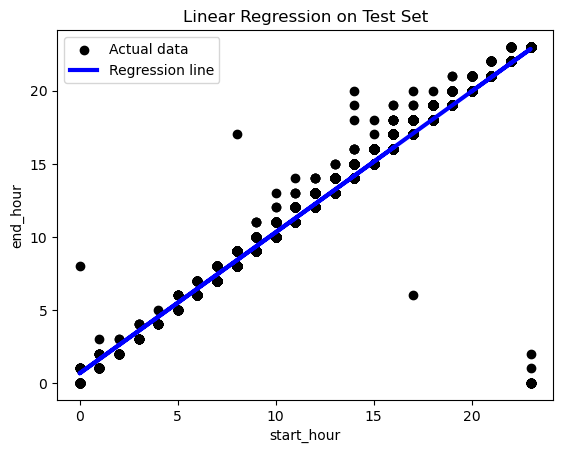

In [13]:
#  Plot the Regression Line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression on Test Set')
plt.xlabel('start_hour')
plt.ylabel('end_hour')
plt.legend()
plt.show()

# Interpretation: 
Regression Line: The blue line represents the linear regression model fitted to the test data. To examine the influence of an independent variable(start_hour) on one dependent variable(end_hour). We have a straight line, indicating that the model predicts a higher linear relationship between the dependent and the independent variables with most data points clustering around the straight line. 

Model Performance: Based on the plot, the model appears to have a best fit. 
The actual data points are clustered around the regression line, almost for all hours with a few outliers deviating far from the line. 
This could result in high model performance metrics like R-squared (R²) and high Mean Squared Error (MSE).

In [14]:
#  Check Model Performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 1.699600113990681
R2 Score: 0.9282087954070666


In [15]:
### mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.699600113990681
R-squared: 0.9282087954070666


In [16]:
#   Compare Predicted vs Actual

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


   Actual  Predicted
0      16  16.096137
1       8   8.374037
2      19  18.026661
3      15  15.130874
4      16  16.096137


# Observations:Small  MSE:Meaning that the regression line passes fairly close to the observations, making it a good fits.e R² ScoreIndicates a good fit with the model fitting as a horizontal line therefore performing welloned Variation in PredictionThis showssts the mo 't capturing data trndormance.

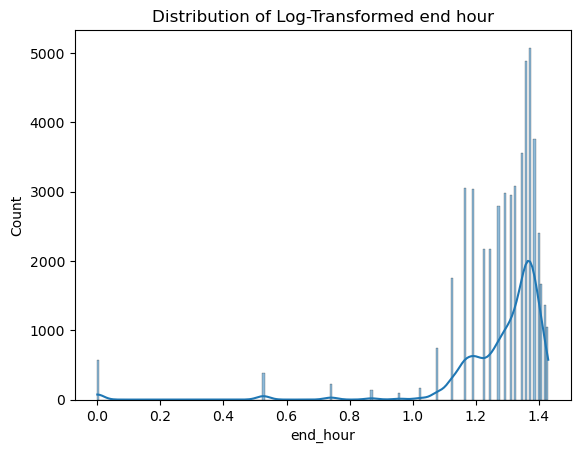

In [35]:
# # Apply log transformation to the dependent variable
data_cleaned['end_hour'] = np.log1p(data_cleaned['start_hour'])

# Checking the distribution after transformation
sns.histplot(data_cleaned['end_hour'], kde=True)
plt.title('Distribution of Log-Transformed end hour')
plt.show()

In [36]:
# Using one-hot encoding for the 'trip_duration' column
encoded_regions = pd.get_dummies(data_cleaned['trip_duration'], drop_first=True)

In [37]:
# Combine the encoded regions with any other features if you have them
# Assuming you only have the one-hot encoded regions as features
X = encoded_regions
y = data_cleaned['end_hour'].values

In [38]:
# # Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [40]:
# # Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.771632650390893e+22
R-squared: -3.23836638551816e+24


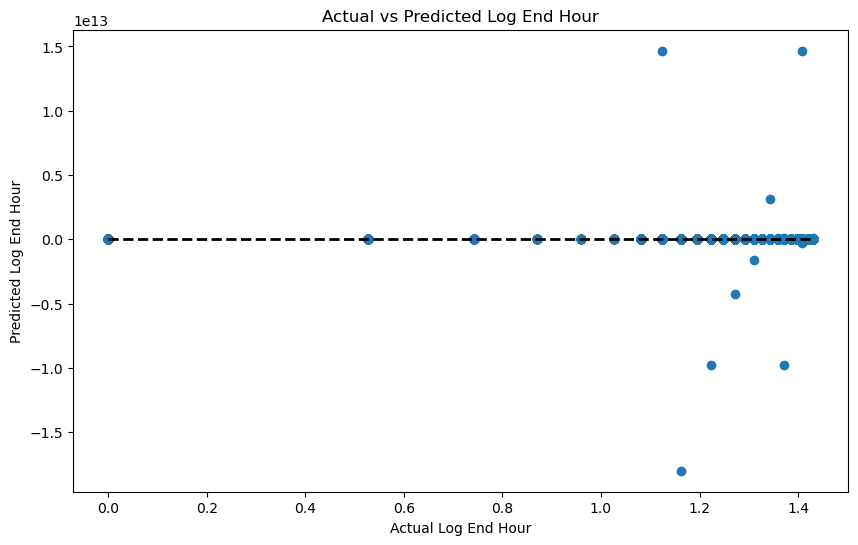

In [41]:
## Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log End Hour')
plt.ylabel('Predicted Log End Hour')
plt.title('Actual vs Predicted Log End Hour')
plt.show()

In [42]:
# Explore Robust Regression
# Initialize the robust model
robust_model = HuberRegressor()

# Train the model
robust_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_robust = robust_model.predict(X_test)

# Evaluating the model
mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)

print(f"Robust Model Mean Squared Error: {mse_robust}")
print(f"Robust Model R-squared: {r2_robust}")

C:\Users\25670\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Robust Model Mean Squared Error: 0.03175286353698042
Robust Model R-squared: -0.05230527590483325


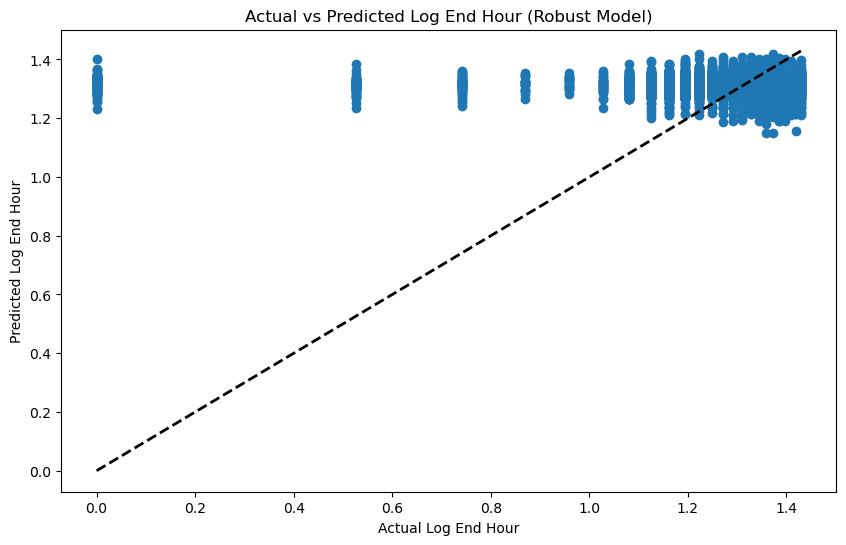

In [43]:
# Plot the results using the robust model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_robust)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Log End Hour')
plt.ylabel('Predicted Log End Hour')
plt.title('Actual vs Predicted Log End Hour (Robust Model)')
plt.show()

### Trying with trip_duration against end_hour

### Hypotheses:
Null Hypothesis (H0): There is no significant relationship between "trip_duration" and the "end_hour."
Alternative Hypothesis (H1):  There is a significant relationship between "trip_duration" and the "end_hour."

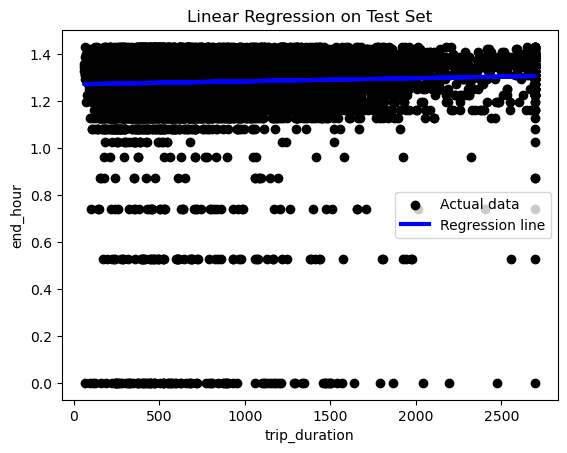

MSE: 0.030102234529298146
R² Score: 0.0023973688290089834
     Actual  Predicted
0  1.343703   1.274536
1  1.162283   1.281957
2  1.385227   1.278273
3  1.327761   1.275957
4  1.343703   1.277404


In [46]:
# Prepare data
X = data_cleaned[['trip_duration']].values
y = data_cleaned['end_hour'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression on Test Set')
plt.xlabel('trip_duration')
plt.ylabel('end_hour')
plt.legend()
plt.show()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

# Compare
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

# Observations:
Regression Line: The regression line is almost flat indicating that the model predicts a relatively constant value of the dependent variable, regardless of the independent variable. This suggests that the model finds little to no relationship between the end hour and trip duration.

R² Score: An R² of approximately 0.0023973688290089834 indicates a poor fit since the values are closer to 0.
MSE Value: A very low MSE of about 0.030102234529298146 a regression may not be the best model to represent this data and can’t accurately predict the influence.
# Interpretation:
The model appears to have a poor fit based on the result of the regression line.
The low R² score signifies a low predictive power of the independent variable.
The plot and statistics suggest that the null hypothesis should be accepted, supporting the idea of no relationship.

### NOTE:
There is not much that one can do with this dataset in terms of a linear regression model due to its randomness. This could also be because most of the numerical variables are geographical.

There are about 6979 missing values in the birth_year column which in turn affects the Age column making it hard to use for analysis.